In [14]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
 
# matplotlib
plt.figure(figsize = (8,8))


 #seaborn
import seaborn as sns
sns.set_style('white')
sns.set(rc={"figure.figsize": (5,5)})
sns.set_style("white")
sns.reset_orig()


In [15]:
clinvar = pd.read_csv("../clinvar-conflicting/clinvar_conflicting.csv")

/Users/Stav/anaconda2/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
clinvar.head()

CHROM     POS REF ALT  AF_ESP  AF_EXAC  AF_TGP  \
0     1  955563   G   C  0.0000  0.00000  0.0000   
1     1  955597   G   T  0.0000  0.42418  0.2826   
2     1  955619   G   C  0.0000  0.03475  0.0088   
3     1  957640   C   T  0.0318  0.02016  0.0328   
4     1  976059   C   T  0.0000  0.00022  0.0010   

                                      CLNDISDB CLNDISDBINCL  \
0  MedGen:C3808739,OMIM:615120|MedGen:CN169374          NaN   
1                              MedGen:CN169374          NaN   
2  MedGen:C3808739,OMIM:615120|MedGen:CN169374          NaN   
3  MedGen:C3808739,OMIM:615120|MedGen:CN169374          NaN   
4                              MedGen:CN169374          NaN   

                                              CLNDN   ...    SIFT PolyPhen  \
0  Myasthenic_syndrome,_congenital,_8|not_specified   ...     NaN      NaN   
1                                     not_specified   ...     NaN      NaN   
2  Myasthenic_syndrome,_congenital,_8|not_specified   ...     NaN      NaN   
3  Myasthenic_syndrome,_congenital,_8|not_specified   ...     NaN      NaN   
4                                     not_specified   ...     NaN      NaN   

  MOTIF_NAME MOTIF_POS HIGH_INF_POS MOTIF_SCORE_CHANGE  LoFtool  CADD_PHRED  \
0        NaN       NaN          NaN                NaN    0.421      11.390   
1        NaN       NaN          NaN                NaN    0.421       8.150   
2        NaN       NaN          NaN                NaN    0.421       3.288   
3        NaN       NaN          NaN                NaN    0.421      12.560   
4        NaN       NaN          NaN                NaN    0.421      17.740   

   CADD_RAW BLOSUM62  
0  1.133255     -2.0  
1  0.599088      NaN  
2  0.069819      1.0  
3  1.356499      NaN  
4  2.234711      NaN  

[5 rows x 46 columns]

# Basic EDA

In [17]:
clinvar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
CHROM                 65188 non-null object
POS                   65188 non-null int64
REF                   65188 non-null object
ALT                   65188 non-null object
AF_ESP                65188 non-null float64
AF_EXAC               65188 non-null float64
AF_TGP                65188 non-null float64
CLNDISDB              65188 non-null object
CLNDISDBINCL          76 non-null object
CLNDN                 65188 non-null object
CLNDNINCL             76 non-null object
CLNHGVS               65188 non-null object
CLNSIGINCL            76 non-null object
CLNVC                 65188 non-null object
CLNVI                 27659 non-null object
MC                    58219 non-null object
ORIGIN                59065 non-null float64
SSR                   104 non-null float64
CLASS                 65188 non-null int64
Allele                65188 non-null object
Consequence        

Text(0.5,1,'distribution of conflicts vs no conflicts')

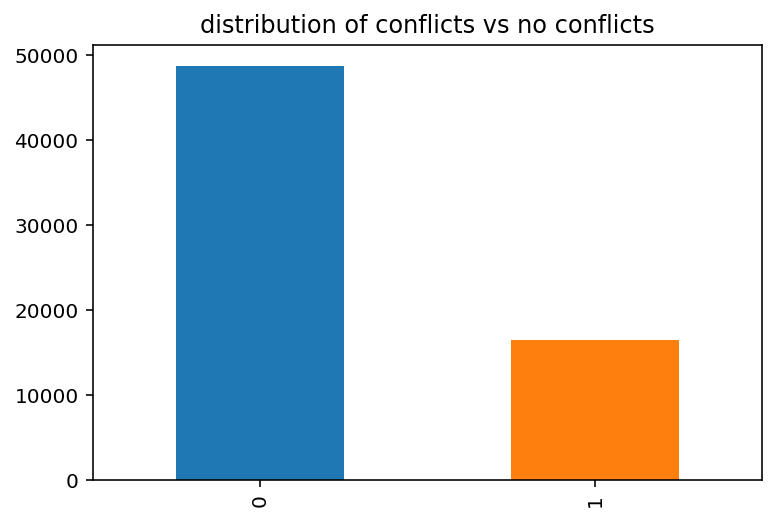

In [23]:
clinvar.CLASS.value_counts().plot(kind = "bar")
plt.title("distribution of conflicts vs no conflicts")

Text(0.5,1,'distirubition # of genes by chromosome')

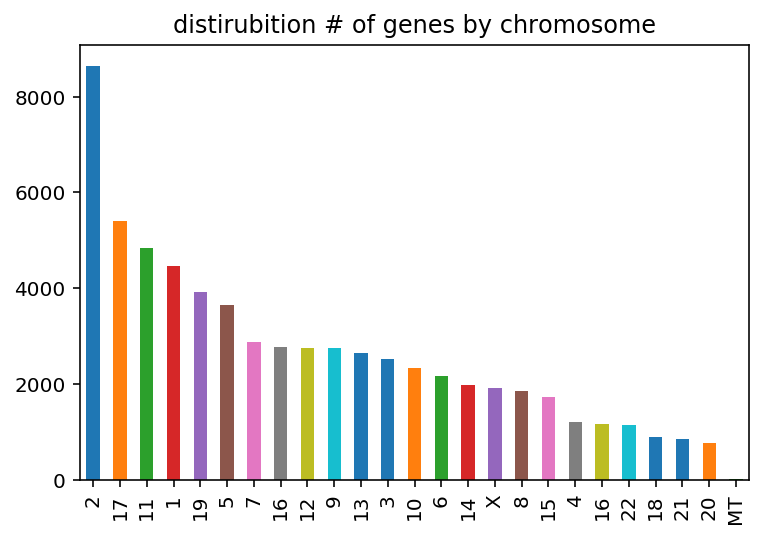

In [25]:
clinvar.CHROM.value_counts().plot(kind = "bar")
plt.title("distirubition # of genes by chromosome")

In [32]:
clinvar.groupby(["CLASS","CHROM"]).count()

POS   REF   ALT  AF_ESP  AF_EXAC  AF_TGP  CLNDISDB  \
CLASS CHROM                                                        
0     1      3237  3237  3237    3237     3237    3237      3237   
      2      6364  6364  6364    6364     6364    6364      6364   
      3      1868  1868  1868    1868     1868    1868      1868   
      4       887   887   887     887      887     887       887   
      5      2919  2919  2919    2919     2919    2919      2919   
      6      1576  1576  1576    1576     1576    1576      1576   
      7      2069  2069  2069    2069     2069    2069      2069   
      8      1399  1399  1399    1399     1399    1399      1399   
      9      2012  2012  2012    2012     2012    2012      2012   
      10     1709  1709  1709    1709     1709    1709      1709   
      11     3833  3833  3833    3833     3833    3833      3833   
      12     2095  2095  2095    2095     2095    2095      2095   
      13     1883  1883  1883    1883     1883    1883      1883   
      14     1401  1401  1401    1401     1401    1401      1401   
      15     1222  1222  1222    1222     1222    1222      1222   
      16     2122  2122  2122    2122     2122    2122      2122   
      16      904   904   904     904      904     904       904   
      17     4146  4146  4146    4146     4146    4146      4146   
      18      657   657   657     657      657     657       657   
      19     2977  2977  2977    2977     2977    2977      2977   
      20      538   538   538     538      538     538       538   
      21      600   600   600     600      600     600       600   
      22      925   925   925     925      925     925       925   
      MT        5     5     5       5        5       5         5   
      X      1406  1406  1406    1406     1406    1406      1406   
1     1      1217  1217  1217    1217     1217    1217      1217   
      2      2281  2281  2281    2281     2281    2281      2281   
      3       661   661   661     661      661     661       661   
      4       319   319   319     319      319     319       319   
      5       724   724   724     724      724     724       724   
      6       583   583   583     583      583     583       583   
      7       798   798   798     798      798     798       798   
      8       453   453   453     453      453     453       453   
      9       732   732   732     732      732     732       732   
      10      632   632   632     632      632     632       632   
      11     1013  1013  1013    1013     1013    1013      1013   
      12      655   655   655     655      655     655       655   
      13      763   763   763     763      763     763       763   
      14      573   573   573     573      573     573       573   
      15      503   503   503     503      503     503       503   
      16      649   649   649     649      649     649       649   
      16      252   252   252     252      252     252       252   
      17     1248  1248  1248    1248     1248    1248      1248   
      18      239   239   239     239      239     239       239   
      19      934   934   934     934      934     934       934   
      20      221   221   221     221      221     221       221   
      21      243   243   243     243      243     243       243   
      22      210   210   210     210      210     210       210   
      MT       11    11    11      11       11      11        11   
      X       520   520   520     520      520     520       520   

             CLNDISDBINCL  CLNDN  CLNDNINCL    ...     SIFT  PolyPhen  \
CLASS CHROM                                    ...                      
0     1                 5   3237          5    ...     1130      1130   
      2                 8   6364          8    ...     2141      2044   
      3                 3   1868          3    ...      702       702   
      4                 0    887          0    ...      296       296   
      5                 1   2919       

In [20]:
clinvar.Consequence.value_counts()

missense_variant                                                  31444
synonymous_variant                                                17668
intron_variant                                                     4403
splice_region_variant&intron_variant                               3393
frameshift_variant                                                 1774
stop_gained                                                        1702
missense_variant&splice_region_variant                              964
5_prime_UTR_variant                                                 626
inframe_deletion                                                    583
splice_region_variant&synonymous_variant                            552
splice_donor_variant                                                539
3_prime_UTR_variant                                                 428
splice_acceptor_variant                                             401
inframe_insertion                                               

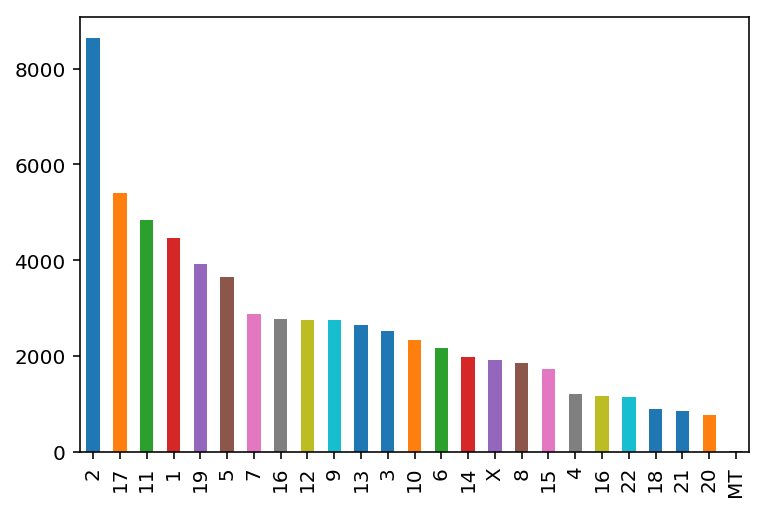

In [18]:
# 
clinvar.CHROM.value_counts().plot(kind = "bar")
plt.title("clin_")